<a href="https://colab.research.google.com/github/chancey922/covid19-model/blob/main/covid19_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 前期准备
导入库和读取数据

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 数据预处理
import pandas as pd
df = pd.read_excel('real_data.xlsx')
value = df['全国累计确诊'].values[10:67]
print(len(value))
x = []
y = []
seq = 3
for i in range(len(value)-seq-1):
    x.append(value[i:i+seq])
    y.append(value[i+seq])
#print(x, '\n', y)

57


In [3]:
df

,时间,湖北新增确诊,湖北现有确诊,全国累计确诊,Unnamed: 4,Unnamed: 5,韩国累计确诊,Unnamed: 7,Unnamed: 8,SARS全国,Unnamed: 10,Unnamed: 11
0,1.16,4,45,NaN,NaN,2.21,208.0,NaN,NaN,1435.0,NaN,6月25日 共5327例 死348例
1,1.17,17,62,NaN,NaN,2.22,433.0,NaN,NaN,1807.0,NaN,6月24日 共5326例 死347例
2,1.18,59,121,NaN,NaN,2.23,433.0,NaN,NaN,2001.0,NaN,6月23日 共5326例 死347例
3,1.19,77,198,NaN,NaN,2.24,833.0,NaN,NaN,2305.0,NaN,6月22日 共5326例 死347例
4,1.2,72,270,NaN,NaN,2.25,799.0,NaN,NaN,2422.0,NaN,6月21日 共5326例 死347例
...,...,...,...,...,...,...,...,...,...,...,...,...
63,3.19,0,6287,81300.0,NaN,NaN,NaN,NaN,NaN,5326.0,NaN,4月23日 共2305例 死106例
64,3.20.,0,5719,81416.0,NaN,NaN,NaN,NaN,NaN,5326.0,NaN,4月21日 共2001例 死92例
65,3.21,0,5224,81498.0,NaN,NaN,NaN,NaN,NaN,5326.0,NaN,4月20日 共1807例 死79例
66,3.22,0,4768,81600.0,NaN,NaN,NaN,NaN,NaN,5327.0,NaN,4月15日 共1435例 死64例


# 模型构建

In [4]:
#分割数据集
train_x = (torch.tensor(x[0:40]).float()/100000.).reshape(-1, seq, 1)
train_y = (torch.tensor(y[0:40]).float()/100000.).reshape(-1, 1)
test_x = (torch.tensor(x[40:57]).float()/100000.).reshape(-1, seq, 1)
test_y = (torch.tensor(y[40:57]).float()/100000.).reshape(-1, 1)
print(test_y)

tensor([[0.8092],
        [0.8095],
        [0.8098],
        [0.8100],
        [0.8102],
        [0.8105],
        [0.8108],
        [0.8112],
        [0.8115],
        [0.8123],
        [0.8130],
        [0.8142],
        [0.8150]])


In [5]:
# 模型训练
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=16, num_layers=1, batch_first=True)
        self.linear = nn.Linear(16 * seq, 1)
    def forward(self, x):
        x, (h, c) = self.lstm(x)
        x = x.reshape(-1, 16 * seq)
        x = self.linear(x)
        return x

# 模型训练
model = LSTM()
optimzer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = nn.MSELoss()
model.train()


LSTM(
  (lstm): LSTM(1, 16, batch_first=True)
  (linear): Linear(in_features=48, out_features=1, bias=True)
)

In [6]:
for epoch in range(400):
    output = model(train_x)
    loss = loss_func(output, train_y)
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()
    if epoch % 20 == 0:
        tess_loss = loss_func(model(test_x), test_y)
        print("epoch:{}, train_loss:{}, test_loss:{}".format(epoch, loss, tess_loss))

epoch:0, train_loss:0.3821497857570648, test_loss:0.5748719573020935
epoch:20, train_loss:0.066442109644413, test_loss:0.00018585972429718822
epoch:40, train_loss:0.025051075965166092, test_loss:0.013004855252802372
epoch:60, train_loss:0.005460820160806179, test_loss:0.0008794009918347001
epoch:80, train_loss:0.0024912990629673004, test_loss:0.002265713643282652
epoch:100, train_loss:0.001792054041288793, test_loss:0.000184164586244151
epoch:120, train_loss:0.0015883429441601038, test_loss:0.000519231369253248
epoch:140, train_loss:0.0014386266702786088, test_loss:0.0003404994204174727
epoch:160, train_loss:0.0012954609701409936, test_loss:0.00030498072737827897
epoch:180, train_loss:0.001156879821792245, test_loss:0.000242962792981416
epoch:200, train_loss:0.0010252958163619041, test_loss:0.00019098786287941039
epoch:220, train_loss:0.0009041220764629543, test_loss:0.0001394478022120893
epoch:240, train_loss:0.0007972942548803985, test_loss:9.60077959462069e-05
epoch:260, train_loss:

54
13


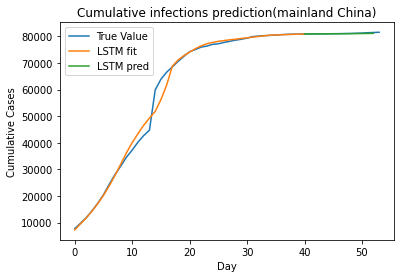

In [7]:
# 模型预测、画图
model.eval()
prediction = list((model(train_x).data.reshape(-1))*100000) + list((model(test_x).data.reshape(-1))*100000)
plt.plot(value[3:], label='True Value')
plt.plot(prediction[:41], label='LSTM fit')
plt.plot(np.arange(40, 53, 1), prediction[40:], label='LSTM pred')
print(len(value[3:]))
print(len(prediction[40:]))
plt.legend(loc='best')
plt.title('Cumulative infections prediction(mainland China)')
plt.xlabel('Day')
plt.ylabel('Cumulative Cases')
plt.show()


# 传染病学仿真

In [ ]:
# SEIR传染病模型仿真
'没有解析解，ode求解数值解'
'重点是动力学模型的准确性（SEIR还是SEIRS、SIQR、SIQS模型，以及媒体宣传和随机因素的影响），难点是beta，gamma，sigma/Te的取值'
'模型忽略迁入率和迁出率，潜伏者传染率beta2，参数设置参考钟院士等文章http://dx.doi.org/10.21037/jtd.2020.02.64'
######################################
# N: 区域内总人口                      #
# S: 易感者                           #
# E: 潜伏者                           #
# I: 感染者                           #
# R: 康复者                           #
# r: 每天接触的人数                    #
# r2: 潜伏者每天接触的人数              #
# beta1: 感染者传染给易感者的概率, I——>S #
# beta2: 潜伏者感染易感者的概率, E——>S   #
# sigma: 潜伏者转化为感染者的概率, E——>I #
# gama: 康复概率, I——>R                #
# T: 传播时间                          #
#######################################

## 导入包

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi


In [10]:
# 阶段一，11.24 - 1.23  1.11
N = 60000000         # 湖北省为6000万，武汉900万
E_0 = 0
I_0 = 1
R_0 = 0
S_0 = N - E_0 - I_0 - R_0
b1 = 0.02         # 真实数据拟合得出
b2 = 0.021/3#0.007
# r2 * beta2 = 2
sigma = 1/14         # 1/14, 潜伏期的倒数
gamma = 1/7          # 1/7, 感染期的倒数
r = 18                # 政府干预措施决定
T = 84

In [11]:
#ode求解
INI = [S_0, E_0, I_0, R_0]
def SEIR(inivalue, _):
    X = inivalue
    Y = np.zeros(4)
    # S数量
    Y[0] = - (r * b1 * X[0] * X[2]) / N - (r * b2 * X[0] * X[1]) / N
    # E数量
    Y[1] = (r * b1 * X[0] * X[2]) / N + (r * b2 * X[0] * X[1]) / N - sigma * X[1]
    # I数量
    Y[2] = sigma * X[1] - gamma * X[2]
    # R数量
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0, T+1)
Res = spi.odeint(SEIR, INI, T_range)
S_t = Res[:, 0]
E_t = Res[:, 1]
I_t = Res[:, 2]
R_t = Res[:, 3]
#print(I_t[60], type(I_t)) # 549 <class 'numpy.ndarray'>
#print(E_t[57])


# 阶段二，1.23后
S_2 = S_t[T]
E_2 = E_t[T]
I_2 = I_t[T]
R_2 = R_t[T]

beta1 = 0.02#0.15747     # 真实数据拟合得出
beta2 = 0.021/3#0.78735
# r2 * beta2 = 2
sigma2 = 1/4   # 1/14, 潜伏期的倒数
#gamma = 1/6.736     # 1/7, 感染期的倒数
r2 = 0.1              # 政府干预措施决定
T2 = 150-T

#ode求解
INI = [S_2, E_2, I_2, R_2]
def SEIR(inivalue, _):
    X = inivalue
    Y = np.zeros(4)
    # S数量
    Y[0] = - (r2 * beta1 * X[0] * X[2]) / N - (r2 * beta2 * X[0] * X[1]) / N
    # E数量
    Y[1] = (r2 * beta1 * X[0] * X[2]) / N + (r2 * beta2 * X[0] * X[1]) / N - sigma2 * X[1]
    # I数量
    Y[2] = sigma2 * X[1] - gamma * X[2]
    # R数量
    Y[3] = gamma * X[2]
    return Y

T_range = np.arange(0, T2+1)
Res = spi.odeint(SEIR, INI, T_range)
S_t2 = Res[:, 0]
E_t2 = Res[:, 1]
I_t2 = Res[:, 2]
R_t2 = Res[:, 3]

In [13]:
plt.figure(figsize=(10, 6))
#显示日期
import pandas as pd
xs = pd.date_range(start='20191124', periods=T+1, freq='1D')#生成2020-02-11类型的日期数组（）
#print(xs)
xs2 = pd.date_range(start='20200216', periods=T2+1, freq='1D')


<Figure size 720x432 with 0 Axes>

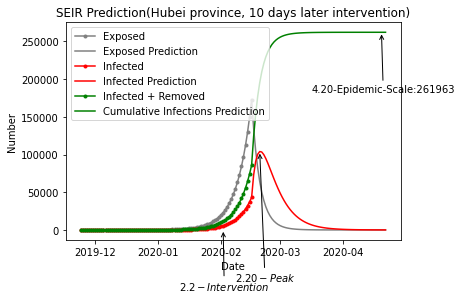

In [19]:
#plt.plot(S_t, color='blue', label='Susceptibles')#, marker='.')
plt.plot(xs, E_t, color='grey', label='Exposed', marker='.')
plt.plot(xs2, E_t2, color='grey', label='Exposed Prediction')
plt.plot(xs, I_t, color='red', label='Infected', marker='.')
plt.plot(xs2, I_t2, color='red', label='Infected Prediction')
plt.plot(xs, I_t + R_t, color='green', label='Infected + Removed', marker='.')
plt.plot(xs2, I_t2 + R_t2, color='green', label='Cumulative Infections Prediction')
#plt.plot(np.arange(0, T+1, 1), I_t + R_t, color='green', label='Removed')
#plt.plot(np.arange(T, T+T2+1, 1), I_t2 + R_t2, color='green', label='Infected2')
plt.xlabel('Date')
plt.ylabel('Number')
plt.title('SEIR Prediction(Hubei province, 10 days later intervention)')
plt.legend()
xs3 = pd.date_range(start='20200202', periods=1, freq='1D')
#plt.plot(xs3, np.arange(1000, 2000, 1000))
plt.annotate(r'$2.2-Intervention$', xy=(xs3, 200), xycoords='data', xytext=(-44, -60), textcoords='offset points',
             fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))
#print(I_t2)
xs4 = pd.date_range(start='20200220', periods=1, freq='1D')
plt.annotate(r'$2.20-Peak$', xy=(xs4, 103911), xycoords='data', xytext=(-25, -130), textcoords='offset points',
             fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))
#print(R_t2)
xs5 = pd.date_range(start='20200420', periods=1, freq='1D')
plt.annotate(r'4.20-Epidemic-Scale:261963', xy=(xs5, 261963), xycoords='data', xytext=(-70, -60), textcoords='offset points',
             fontsize=10, arrowprops=dict(arrowstyle='->', connectionstyle='arc3, rad=0'))
#plt.text(30, 10, r'$This\ is\ the\ some\ text.\ \mu_j\ \sigma_i\ \alpha_t$')
plt.show()